# <font color=blue><u>  <center>Healthcare - diabetes prediction model</center> </u> </font>

###  Problem Statement 
NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.

The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

Build a model to accurately predict whether the patients in the dataset have diabetes or not.

<i>Dataset available <a href="https://github.com/Simplilearn-Edu/Data-Science-Capstone-Projects">here</a></i>

### Dataset description


|Variables|Description|
|---------|-----------|
|Pregnancies|Number of times pregnant|
|Glucose|Plasma glucose concentration in an oral glucose tolerance test|
|BloodPressure|Diastolic blood pressure (mm Hg)|
|SkinThickness|Triceps skinfold thickness (mm)|
|Insulin|Two hour serum insulin|
|BMI|Body Mass Index|
|DiabetesPedigreeFunction|Diabetes pedigree function|
|Age|Age in years|
|Outcome|Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0|


<hr>

In [1]:
#Load the requied libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,auc,roc_curve

from mlxtend.preprocessing import standardize

from IPython.display import Image


#### Load dataset

In [2]:
#Reading the input
df_input = pd.read_csv('health_care_diabetes.csv')

In [3]:
#Information about the dataset
df_input.info()
print (f"Number of records in dataframe{df_input.shape[0]}")  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Number of records in dataframe768


#### <font color='green'> Observations:</font>
####  &nbsp; &nbsp; &nbsp; &nbsp; Records in dataset : 768 
<hr><br>

In [4]:
#Checking for any null values
df_input.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

#### <font color='green'> Observations:</font>
####  &nbsp; &nbsp; &nbsp; &nbsp;  There are no null values in the dataset.
<hr><br>


### Data Exploration task
1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

    • Glucose

    • BloodPressure

    • SkinThickness

    • Insulin

    • BMI

2. Visually explore these variables using histograms. Treat the missing values accordingly.

3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.

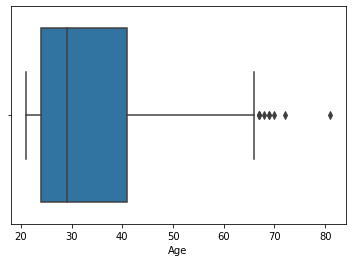

In [5]:
#Box plot graph for the age
sns.boxplot(df_input.Age);


#### <font color='green'> Observations:</font>
####  &nbsp; &nbsp; &nbsp; &nbsp; There are outliers in the age after 65. However it's just an observation and won't impact the data.
<hr><br>

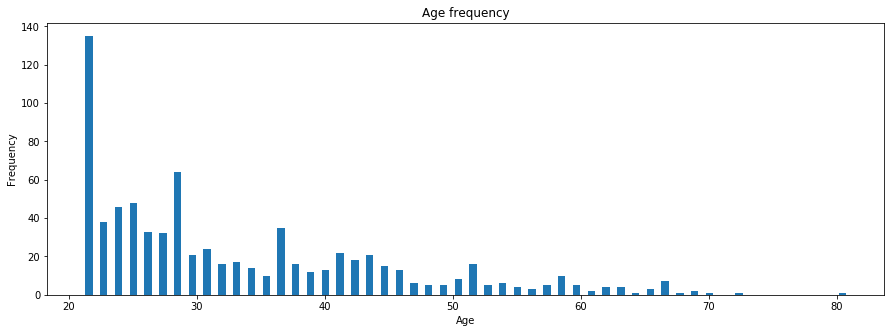

In [6]:
#Histogram demonstrating age frequencies
plt.figure(figsize=(15,5))
plt.hist(x=df_input.Age,bins=(np.unique(df_input.Age).size),rwidth=.5,align='mid')
plt.title("Age frequency")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

#### <font color='green'> Observations:</font>
####  &nbsp; &nbsp; &nbsp; &nbsp; Age frequency chart shown above.
<hr><br>

In [7]:
# Create the number of times pregnancy count
preg_values = df_input.Pregnancies.value_counts()
print (preg_values)

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64


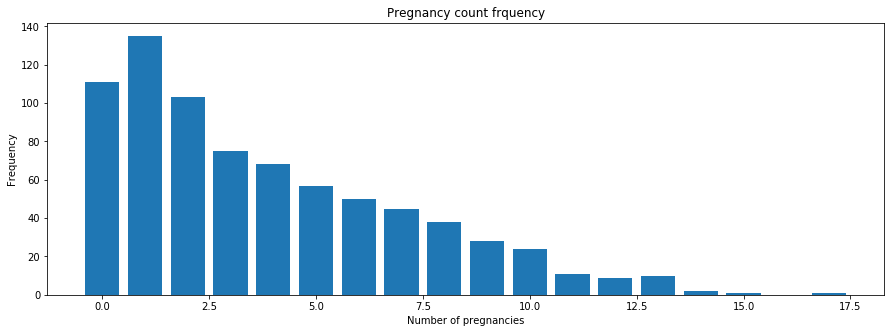

In [8]:
#Graph showing number of times pregnant
plt.figure(figsize=(15,5))
plt.bar(x=preg_values.index, height=preg_values.values, align='center')
plt.xlabel("Number of pregnancies")
plt.ylabel("Frequency")
plt.title("Pregnancy count frquency")
plt.show()

#### <font color='green'> Observations:</font>
####  &nbsp; &nbsp; &nbsp; &nbsp; Frequency graph for number of times pregnancy shown above.
<hr><br>

### <center>Checking for zero values in Glucose</center>

In [9]:
#Find the number rows having value of Glucose as zero
df_input[df_input.Glucose==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


#### <font color='green'> Observations:</font>
####  &nbsp; &nbsp; &nbsp; &nbsp; There are 5 records having missing glucose value.
<hr><br>

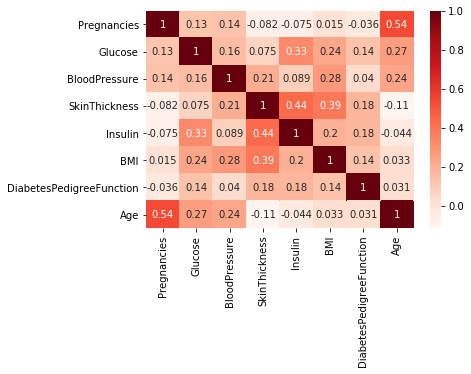

In [10]:
#Creating dataframe with Glucose != zero
df_dummy = df_input[df_input['Glucose'] != 0].copy()
df_dummy.drop(['Outcome'],axis=1,inplace=True)
#Plotting the correlation between variables using heatmap.
sns.heatmap(df_dummy.corr(), cmap='Reds',annot=True);

#### <font color='green'> Observations:</font>
####  &nbsp; &nbsp; &nbsp; &nbsp; Glucose and Insulin variable is related. But for the missing Glucose variable, having Inslulin also having zero value. 
#### &nbsp; &nbsp; &nbsp; &nbsp; Replacing the missing glucose values with that of similar aged persons.
<hr><br>

In [11]:
#Unique glucose values for persons having age = 22
print(np.unique(df_input[df_input.Age==22].Glucose))
# mean value of glucose for persons with age = 22
print(np.mean(df_input[df_input.Age==22].Glucose))

[  0  56  71  74  79  80  81  83  87  88  90  91  92  93  95  97  98  99
 101 103 104 105 106 108 109 111 113 117 119 120 122 123 127 128 130 131
 136 137 139 141 142 143 148 151 173 175 179 181 188 199]
108.20833333333333


In [12]:
df_input[(df_input.Age==22) & (df_input.Glucose == 0)].Glucose 

75     0
342    0
Name: Glucose, dtype: int64

In [13]:
locations = df_input[(df_input.Age==22) & (df_input.Glucose == 0)]

In [14]:
#Replacing 0 value with 108 for persons having age= 22
for i in locations.index:
    df_input.loc[i, 'Glucose'] = 108

In [15]:
#Unique glucose values for persons having age = 21
print(np.unique(df_input[df_input.Age==21].Glucose))
# mean value of glucose for persons with age = 21
print(np.mean(df_input[df_input.Age==21].Glucose))

[  0  71  73  78  80  84  87  89  90  91  94  96  97  99 100 101 102 105
 108 109 111 112 113 114 115 116 117 118 124 125 126 130 131 132 134 137
 138 139 142 143 151 177]
108.31746031746032


In [16]:
locations = df_input[(df_input.Age==21) & (df_input.Glucose == 0)]
#Replacing 0 value with 108 for persons having age= 21
for i in locations.index:
    df_input.loc[i, 'Glucose'] = 108

In [17]:
#Unique glucose values for persons having age = 37
print(np.unique(df_input[df_input.Age==37].Glucose))
# mean value of glucose for persons with age = 37
print(np.mean(df_input[df_input.Age==37].Glucose))

[  0  88 105 114 116 119 124 128 130 133 137 144 150 154 179 186 189]
130.1578947368421


In [18]:
locations = df_input[(df_input.Age==37) & (df_input.Glucose == 0)]
#Replacing 0 value with 130 for persons having age= 37
for i in locations.index:
    df_input.loc[i, 'Glucose'] = 130

In [19]:
#Unique glucose values for persons having age = 41
print(np.unique(df_input[df_input.Age==41].Glucose))
# mean value of glucose for persons with age = 41
print(np.mean(df_input[df_input.Age==41].Glucose))

[  0  57  62  76  80  94 104 112 120 122 125 129 140 143 168 178 180 184
 187 189 194 196]
129.0909090909091


In [20]:
locations = df_input[(df_input.Age==41) & (df_input.Glucose == 0)]
#Replacing 0 value with 129 for persons having age= 37
for i in locations.index:
    df_input.loc[i, 'Glucose'] = 129

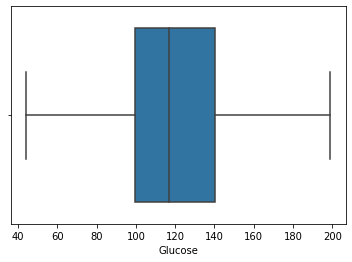

In [21]:
#Checking for zero outliers
sns.boxplot(df_input.Glucose);

#### <font color='green'> Observations:</font>
####  &nbsp; &nbsp; &nbsp; &nbsp; Removed zero values for glucose from dataset.
<hr>
<br>


### <center>Checking zero values in Blood pressure</center>

In [22]:
# data rows having Blood pressure is zero
df_input[df_input['BloodPressure'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [23]:
#Number of records having BloodPressure = 0
df_input[df_input['BloodPressure'] == 0].shape[0]

35

#### <font color='green'> Observations:</font>
####  &nbsp; &nbsp; &nbsp; &nbsp; There are 35 recprds having BloodPressure = 0
<hr><br>

In [24]:
#Dummy dataframe having Blood pressure not equal to zero.
df_dummy = df_input[df_input['BloodPressure'] != 0].copy()
df_dummy.drop(['Outcome'],axis=1,inplace=True)
df_dummy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


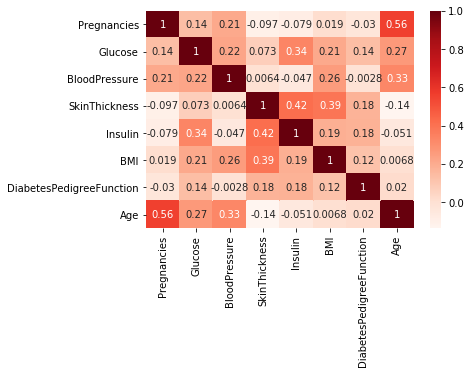

In [25]:
sns.heatmap(df_dummy.corr(), cmap='Reds',annot=True);

#### <font color='green'> Observations:</font>
####  &nbsp; &nbsp; &nbsp; &nbsp; Looks like there is a better relation between Blood pressure and Age. 
#### &nbsp; &nbsp; &nbsp; &nbsp; So we can replace zero with similar values for Blood pressure for corresponding aged people.
<hr><br>

In [26]:
#Unique ages having blood pressure = zero
age_list=np.unique(df_input[df_input['BloodPressure'] == 0].Age)
print (age_list)

[21 22 23 24 25 26 27 28 29 30 31 32 36 37 38 40 41 44 72]


In [27]:
#Creating list with age and mean value of Blood pressure for corresponding age
age_blood_pressure=[]
for age in age_list:
#    print (age, df_dummy[df_dummy["Age"] == age]["BloodPressure"].mean())
    dummy = (age,df_dummy[df_dummy["Age"] == age]["BloodPressure"].mean())
    age_blood_pressure.append(dummy)
print (age_blood_pressure)

[(21, 67.0), (22, 66.4927536231884), (23, 69.82857142857142), (24, 67.9090909090909), (25, 65.0909090909091), (26, 68.3225806451613), (27, 75.87096774193549), (28, 72.45454545454545), (29, 73.29629629629629), (30, 71.6842105263158), (31, 73.57142857142857), (32, 74.73333333333333), (36, 73.73333333333333), (37, 80.16666666666667), (38, 75.86666666666666), (40, 75.0), (41, 74.35), (44, 82.33333333333333), (72, nan)]


In [28]:
# Finding the row having age = 72
df_input[df_input["Age"]==72]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
453,2,119,0,0,0,19.6,0.832,72,0


In [29]:
#dropping the row having age = 72, Blood pressure, skin thickness and insulin as zero.
df_input.drop(index=453,axis=0,inplace=True)

In [30]:
#Creating dataframe where Blood pressure = 0
df_zero_bp = df_input[df_input['BloodPressure'] == 0]
df_zero_bp.shape

(34, 9)

In [31]:
#Replacing zero values with mean blood pressure values corresponding to age
for item in age_blood_pressure:
    loc = (df_zero_bp[df_zero_bp["Age"]==item[0]].index)
    for ix in loc:
        print (f"assigning {item[1]} to location {ix}")
        df_input.loc[ix, 'BloodPressure'] = item[1]


assigning 67.0 to location 60
assigning 66.4927536231884 to location 81
assigning 66.4927536231884 to location 494
assigning 66.4927536231884 to location 697
assigning 69.82857142857142 to location 347
assigning 69.82857142857142 to location 430
assigning 69.82857142857142 to location 535
assigning 67.9090909090909 to location 49
assigning 67.9090909090909 to location 619
assigning 65.0909090909091 to location 172
assigning 65.0909090909091 to location 266
assigning 65.0909090909091 to location 426
assigning 65.0909090909091 to location 589
assigning 68.3225806451613 to location 78
assigning 68.3225806451613 to location 522
assigning 75.87096774193549 to location 261
assigning 72.45454545454545 to location 269
assigning 72.45454545454545 to location 601
assigning 73.29629629629629 to location 7
assigning 73.29629629629629 to location 435
assigning 71.6842105263158 to location 300
assigning 71.6842105263158 to location 706
assigning 73.57142857142857 to location 484
assigning 73.5714285

In [32]:
#Checking for any zero values in BloodPressure column
df_input[df_input['BloodPressure'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [33]:
#Delete un necessary dataframes
del(df_dummy)
del(df_zero_bp)

#### <font color='green'> Observations:</font>
####  &nbsp; &nbsp; &nbsp; &nbsp; Removed Zero values in BloodPressure column 
<hr><br>

### <center> Checking for Zero values in  Skin Thickness columns</center>

In [34]:
df_zero_sk_thickness=df_input[df_input["SkinThickness"] == 0].copy()
print (f"{df_zero_sk_thickness.shape[0]} records having Skinthickness = 0")

226 records having Skinthickness = 0


#### <font color='green'> Observations:</font>
####  &nbsp; &nbsp; &nbsp; &nbsp; 227 records having Skinthickness = 0
<hr><br>

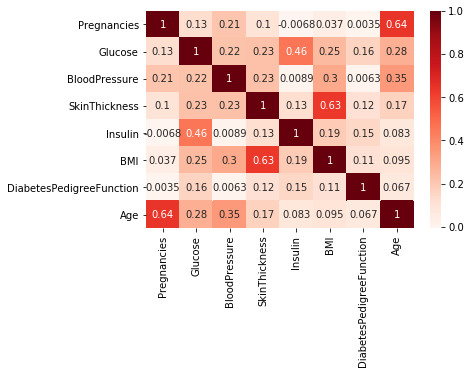

In [35]:
#Fill dataframe with SkinThickness != 0
df_dummy = df_input[df_input["SkinThickness"] !=0].copy()
df_dummy.drop(['Outcome'],axis=1,inplace=True)
sns.heatmap(df_dummy.corr(), cmap='Reds',annot=True);

#### <font color='green'> Observations:</font>
####  &nbsp; &nbsp; &nbsp; &nbsp; There is a relation between Skin Thickness and BMI
####  &nbsp; &nbsp; &nbsp; &nbsp; find and fill the missing Skin Thickness values with those having similar BMI
<hr><br>

In [36]:
#Find unique BMI having Skin Thickness = 0
zero_sthickness_bmi_list=np.unique(df_zero_sk_thickness.BMI)
print (zero_sthickness_bmi_list)

[ 0.  18.2 18.4 19.1 19.9 21.  21.1 21.7 21.8 21.9 22.2 22.4 22.5 22.6
 22.9 23.  23.1 23.2 23.3 23.5 23.6 23.7 23.8 24.  24.2 24.3 24.6 24.7
 24.8 24.9 25.  25.1 25.2 25.6 25.8 25.9 26.  26.1 26.2 26.6 26.7 26.8
 27.  27.1 27.3 27.4 27.5 27.6 27.7 27.8 27.9 28.  28.4 28.7 28.8 28.9
 29.5 29.6 29.7 29.8 29.9 30.  30.1 30.4 30.5 30.8 30.9 31.2 31.6 31.9
 32.  32.3 32.4 32.5 32.6 32.7 32.8 32.9 33.2 33.3 33.7 33.8 34.  34.1
 34.2 34.3 34.4 34.6 34.7 34.9 35.  35.1 35.3 35.4 35.5 35.6 35.7 36.
 36.3 36.8 37.5 37.6 37.7 37.8 37.9 38.  38.5 38.7 39.  39.1 39.4 39.5
 39.6 39.8 39.9 40.1 40.2 40.5 40.8 42.2 42.3 42.4 42.7 42.9 43.2 43.3
 43.4 43.6 44.  44.2 44.5 45.  45.3 45.7 47.9 48.3 48.8 52.3 52.9]


In [37]:
# create dataframe having Skin thickness != 0
df_non_zero_sk_thickness = df_input[df_input.SkinThickness!=0].copy()
df_non_zero_sk_thickness.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,33,1
6,3,78,50.0,32,88,31.0,0.248,26,1


In [38]:
#Create list of pairs having bmi value and mean SkinThickness from dataframe
bmi_sk_thck_list=[]
for bmi in zero_sthickness_bmi_list:
    mean_sk_thick=df_non_zero_sk_thickness[df_non_zero_sk_thickness["BMI"]== bmi]["SkinThickness"].mean()
    if bmi != 0.0 and mean_sk_thick not in [np.NaN,0.0]:
      bmi_sk_thck_list.append ((bmi, mean_sk_thick))
print (bmi_sk_thck_list)

[(18.2, 17.0), (21.0, 17.0), (21.1, 13.0), (21.8, 21.25), (22.2, 19.0), (22.4, 13.0), (22.5, 11.0), (22.9, 13.0), (23.0, 10.0), (23.1, 18.333333333333332), (23.2, 15.0), (23.6, 15.0), (23.7, 14.0), (23.8, 17.0), (24.0, 22.0), (24.2, 20.0), (24.3, 24.0), (24.6, 21.5), (24.7, 23.5), (24.8, 12.5), (25.0, 27.0), (25.1, 25.5), (25.2, 22.4), (25.6, 19.0), (25.8, 19.0), (25.9, 24.2), (26.0, 22.666666666666668), (26.1, 14.0), (26.2, 25.0), (26.6, 21.333333333333332), (26.8, 33.0), (27.1, 20.5), (27.3, 21.333333333333332), (27.4, 25.0), (27.5, 18.0), (27.6, 25.8), (27.7, 22.0), (27.8, 22.0), (27.9, 39.0), (28.0, 32.0), (28.4, 20.25), (28.7, 24.833333333333332), (28.8, 33.0), (28.9, 22.666666666666668), (29.5, 23.0), (29.6, 27.0), (29.7, 24.285714285714285), (29.8, 18.0), (29.9, 20.333333333333332), (30.0, 22.25), (30.1, 27.0), (30.4, 23.5), (30.5, 29.8), (30.8, 26.0), (30.9, 23.25), (31.2, 26.666666666666668), (31.6, 27.333333333333332), (31.9, 30.0), (32.0, 28.636363636363637), (32.3, 29.0), (

In [39]:
#Iterate through above created bmi and skinthickenss list pairs and replace zero with these skinthickness values.
for item in bmi_sk_thck_list:
    loc = df_zero_sk_thickness[df_zero_sk_thickness["BMI"] == item[0]].index
    for ix in loc:
        #print (f"Assigning Skinthickness {item[1]} to location {ix}")
        df_input.loc[ix, "SkinThickness"]=item[1]


In [40]:
print (f'{df_input[df_input["SkinThickness"]==0].shape[0]} records having SkinThickness = 0')
bmi_list = list(np.unique(df_input[df_input["SkinThickness"]==0].BMI))
print ("Unique BMI having skin thickness = 0 :", bmi_list)

41 records having SkinThickness = 0
Unique BMI having skin thickness = 0 : [0.0, 18.4, 19.1, 19.9, 21.7, 21.9, 22.6, 23.3, 23.5, 24.9, 26.7, 27.0, 32.6, 39.6, 40.1, 40.2, 40.8, 42.2, 42.7, 43.2, 45.0, 45.7, 48.3, 48.8, 52.9]


In [41]:
#Removing zero BMI
bmi_list.remove(0)

In [42]:
#Create list of pairs having bmi value and mean SkinThickness from dataframe
#Since we are not getting Skin thicknessa values for the exact BMI, we can get the mean value of Skin thickness for absolute bmi value  and absolute mean value +1
bmi_sk_thck_list=[]
for item in bmi_list:
    round_item = round (item)
    bmi_sk_thck_list.append((item, df_input[(df_input["BMI"]>=round_item)&(df_input["BMI"]<round_item+1)].SkinThickness.mean()))
print (bmi_sk_thck_list)

[(18.4, 12.75), (19.1, 9.875), (19.9, 18.0), (21.7, 12.2), (21.9, 12.2), (22.6, 12.847222222222221), (23.3, 12.847222222222221), (23.5, 19.8125), (24.9, 22.349999999999998), (26.7, 21.839837398373984), (27.0, 21.839837398373984), (32.6, 32.28513356562137), (39.6, 34.3), (40.1, 34.3), (40.2, 34.3), (40.8, 39.0), (42.2, 31.305555555555557), (42.7, 33.05769230769231), (43.2, 33.05769230769231), (45.0, 30.636363636363637), (45.7, 41.888888888888886), (48.3, 0.0), (48.8, 42.666666666666664), (52.9, 56.0)]


In [43]:
for item in bmi_sk_thck_list:
    loc = df_zero_sk_thickness[df_zero_sk_thickness["BMI"] == item[0]].index
    for ix in loc:
        #print (f"Assigning Skinthickness {item[1]} to location {ix}")
        df_input.loc[ix, "SkinThickness"]=item[1]

In [44]:
print (f'{df_input[df_input["SkinThickness"]==0].shape[0]} records having SkinThickness = 0')
bmi_list = list(np.unique(df_input[df_input["SkinThickness"]==0].BMI))
print ("Unique BMI having skin thickness = 0 :", bmi_list)
loc_list = df_input[df_input["SkinThickness"]==0].index
df_input[df_input["SkinThickness"]==0]

10 records having SkinThickness = 0
Unique BMI having skin thickness = 0 : [0.0, 48.3]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96.000000,0.0,0,0.0,0.232,54,1
49,7,105,67.909091,0.0,0,0.0,0.305,24,0
60,2,84,67.000000,0.0,0,0.0,0.304,21,0
81,2,74,66.492754,0.0,0,0.0,0.102,22,0
378,4,156,75.000000,0.0,0,48.3,0.238,32,1
426,0,94,65.090909,0.0,0,0.0,0.256,25,0
494,3,80,66.492754,0.0,0,0.0,0.174,22,0
522,6,114,68.322581,0.0,0,0.0,0.189,26,0
684,5,136,82.000000,0.0,0,0.0,0.640,69,0
706,10,115,71.684211,0.0,0,0.0,0.261,30,1


In [45]:
#Deleting rows having Skin thickness and BMI values are zero.
#Deleting row with BMI = 48.3
for ix in loc_list:
    df_input.drop(index=ix,axis=0,inplace=True)

In [46]:
#Print dataframe with Skin thickness = 0
df_input[df_input["SkinThickness"]==0].shape[0]

0

#### <font color='green'> Observations:</font>
####  &nbsp; &nbsp; &nbsp; &nbsp; Rows having SkinThickness = 0 has been removed
<hr><br>

In [47]:
df_input.shape

(757, 9)

In [48]:
#Deleting unwanted dataframes
del(df_dummy)
del(df_non_zero_sk_thickness)
del(df_zero_sk_thickness)

### <center> Checking zero values in Insulin</center>

In [49]:
df_zero_insulin = df_input[df_input['Insulin']==0].copy()
print (f"Records having Insulin value is Zero:  {df_zero_insulin.shape[0]}")

Records having Insulin value is Zero:  363


#### <font color='green'> Observations:</font>
####  &nbsp; &nbsp; &nbsp; &nbsp; Records having Insulin value is Zero:  364
<hr><br>

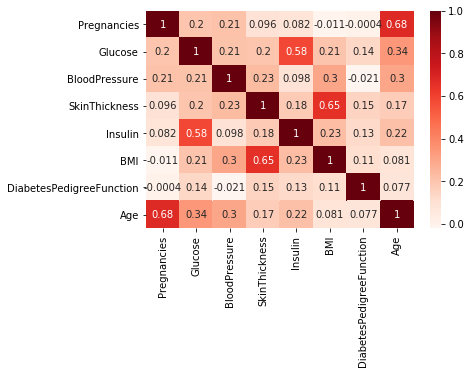

In [50]:
#Create dataframe with Insulin != 0
df_non_zero_insulin = df_input[df_input["Insulin"] !=0].copy()
df_non_zero_insulin.drop(['Outcome'],axis=1,inplace=True)
sns.heatmap(df_non_zero_insulin.corr(), cmap='Reds',annot=True);

#### <font color='green'> Observations:</font>
####  &nbsp; &nbsp; &nbsp; &nbsp; There is relation between Insulin and Glucose
####  &nbsp; &nbsp; &nbsp; &nbsp; Find and fill missing Insulin values with similar insulin values having same Glucose values
<hr><br>

In [51]:
#Find unique glucose list for insulin = 0
glucose_list = np.unique(df_zero_insulin["Glucose"])
# for each glucose values find mean value of Insulin
glucose_insulin = []
for item in glucose_list:
    mean_insulin=df_non_zero_insulin[df_non_zero_insulin["Glucose"]==item]["Insulin"].mean()
    if mean_insulin not in [np.NaN, 0.0]:
        glucose_insulin.append((item,mean_insulin))
print (glucose_insulin)    

[(71, 60.5), (75, 55.0), (78, 64.0), (79, 42.5), (80, 65.0), (81, 57.4), (82, 105.0), (83, 51.25), (84, 90.66666666666667), (85, 49.0), (86, 68.0), (87, 59.0), (88, 52.375), (89, 60.25), (90, 52.75), (91, 132.66666666666666), (92, 141.66666666666666), (93, 97.0), (94, 84.0), (95, 83.75), (96, 73.4), (97, 103.25), (99, 72.8), (100, 102.57142857142857), (101, 142.75), (102, 98.66666666666667), (103, 139.8), (104, 112.0), (105, 164.0), (106, 145.0), (107, 76.0), (108, 114.71428571428571), (109, 127.85714285714286), (110, 112.5), (111, 127.75), (112, 146.16666666666666), (113, 85.0), (114, 198.33333333333334), (115, 118.0), (116, 124.0), (117, 112.57142857142857), (118, 137.66666666666666), (119, 128.5), (120, 118.16666666666667), (121, 111.5), (122, 168.0), (123, 163.66666666666666), (124, 276.1666666666667), (125, 129.0), (126, 132.42857142857142), (127, 243.75), (128, 156.71428571428572), (129, 186.55555555555554), (130, 118.0), (131, 290.5), (133, 147.5), (134, 212.75), (135, 197.5), (

In [52]:
#Iterate through above created bmi and skinthickenss list pairs and replace zero with these skinthickness values.
for item in glucose_insulin:
    loc = df_zero_insulin[df_zero_insulin["Glucose"] == item[0]].index
    for ix in loc:
        #print (f"Assigning Skinthickness {item[1]} to location {ix}")
        df_input.loc[ix, "Insulin"]=item[1]

In [53]:
df_zero_insulin = df_input[df_input['Insulin']==0].copy()
print (f"Records having Insulin value is Zero:  {df_zero_insulin.shape[0]}")
df_zero_insulin.head()

Records having Insulin value is Zero:  32


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64.0,12.847222,0.0,23.3,0.672,32,1
44,7,159,64.0,25.000000,0.0,27.4,0.294,40,0
55,1,73,50.0,10.000000,0.0,23.0,0.248,21,0
62,5,44,62.0,27.000000,0.0,25.0,0.587,36,0
76,7,62,78.0,32.285134,0.0,32.6,0.391,41,0


In [54]:
#Find unique glucose list for insulin = 0
glucose_list = np.unique(df_zero_insulin["Glucose"])
print (glucose_list)

[ 44  57  61  62  65  67  72  73  76 132 159 175 178 182 183 190 194 199]


In [55]:
#Find mean value of Insulin for the records having Glucose value + 1 
glucose_insulin = []
for item in glucose_list:
    mean_insulin=df_non_zero_insulin[df_non_zero_insulin["Glucose"]==item+1]["Insulin"].mean()
    if mean_insulin not in [np.NaN, 0.0]:
        glucose_insulin.append((item,mean_insulin))
print (glucose_insulin)    

[(67, 43.333333333333336), (73, 43.333333333333336), (76, 49.0), (132, 147.5), (159, 175.0), (175, 228.0), (178, 144.5), (183, 277.0), (190, 130.0), (194, 145.0)]


In [56]:
#Iterate through above created bmi and skinthickenss list pairs and replace zero with these skinthickness values.
for item in glucose_insulin:
    loc = df_zero_insulin[df_zero_insulin["Glucose"] == item[0]].index
    for ix in loc:
        #print (f"Assigning Skinthickness {item[1]} to location {ix}")
        df_input.loc[ix, "Insulin"]=item[1]

In [57]:
df_zero_insulin = df_input[df_input['Insulin']==0].copy()
print (f"Records having Insulin value is Zero:  {df_zero_insulin.shape[0]}")
df_zero_insulin.head()

Records having Insulin value is Zero:  9


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
62,5,44,62.0,27.000000,0.0,25.0,0.587,36,0
76,7,62,78.0,32.285134,0.0,32.6,0.391,41,0
146,9,57,80.0,37.000000,0.0,32.8,0.096,41,0
317,3,182,74.0,29.800000,0.0,30.5,0.345,29,1
352,3,61,82.0,28.000000,0.0,34.4,0.243,46,0


In [58]:
#Find unique glucose list for insulin = 0
glucose_list = np.unique(df_zero_insulin["Glucose"])
print (glucose_list)

[ 44  57  61  62  65  72 182 199]


In [59]:
glucose_insulin = []
for item in glucose_list:
    mean_insulin=df_non_zero_insulin[df_non_zero_insulin["Glucose"]==item+2]["Insulin"].mean()
    if mean_insulin not in [np.NaN, 0.0]:
        glucose_insulin.append((item,mean_insulin))
print (glucose_insulin)  

[(72, 43.333333333333336), (182, 277.0)]


In [60]:
#Iterate through above created bmi and skinthickenss list pairs and replace zero with these skinthickness values.
for item in glucose_insulin:
    loc = df_zero_insulin[df_zero_insulin["Glucose"] == item[0]].index
    for ix in loc:
        #print (f"Assigning Skinthickness {item[1]} to location {ix}")
        df_input.loc[ix, "Insulin"]=item[1]

In [61]:
df_zero_insulin = df_input[df_input['Insulin']==0].copy()
print (f"Records having Insulin value is Zero:  {df_zero_insulin.shape[0]}")
df_zero_insulin.head()

Records having Insulin value is Zero:  7


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
62,5,44,62.0,27.000000,0.0,25.0,0.587,36,0
76,7,62,78.0,32.285134,0.0,32.6,0.391,41,0
146,9,57,80.0,37.000000,0.0,32.8,0.096,41,0
352,3,61,82.0,28.000000,0.0,34.4,0.243,46,0
537,0,57,60.0,12.200000,0.0,21.7,0.735,67,0


In [62]:
glucose_insulin = []
for item in glucose_list:
    mean_insulin=df_non_zero_insulin[df_non_zero_insulin["Glucose"]==item-1]["Insulin"].mean()
    if mean_insulin not in [np.NaN, 0.0]:
        glucose_insulin.append((item,mean_insulin))
print (glucose_insulin) 

[(57, 45.0), (72, 60.5), (182, 334.0), (199, 274.0)]


In [63]:
#Iterate through above created bmi and skinthickenss list pairs and replace zero with these skinthickness values.
for item in glucose_insulin:
    loc = df_zero_insulin[df_zero_insulin["Glucose"] == item[0]].index
    for ix in loc:
        #print (f"Assigning Skinthickness {item[1]} to location {ix}")
        df_input.loc[ix, "Insulin"]=item[1]

In [64]:
df_zero_insulin = df_input[df_input['Insulin']==0].copy()
print (f"Records having Insulin value is Zero:  {df_zero_insulin.shape[0]}")
df_zero_insulin

Records having Insulin value is Zero:  4


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
62,5,44,62.0,27.000000,0.0,25.0,0.587,36,0
76,7,62,78.0,32.285134,0.0,32.6,0.391,41,0
352,3,61,82.0,28.000000,0.0,34.4,0.243,46,0
737,8,65,72.0,23.000000,0.0,32.0,0.600,42,0


In [65]:
#Finding the next Glucose value after 44
for i in range (1,20):
    if df_non_zero_insulin[df_non_zero_insulin["Glucose"]==44 + i].empty== False:
        print (i,df_non_zero_insulin[df_non_zero_insulin["Glucose"]==44 + i])

12      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
680            2       56           56.0           28.0       45  24.2   

     DiabetesPedigreeFunction  Age  
680                     0.332   22  


In [66]:
#Assigning the insulin value 45 to index location 62
df_input.loc[62,["Insulin"]]=45

In [67]:
df_zero_insulin = df_input[df_input['Insulin']==0].copy()
print (f"Records having Insulin value is Zero:  {df_zero_insulin.shape[0]}")
df_zero_insulin

Records having Insulin value is Zero:  3


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
76,7,62,78.0,32.285134,0.0,32.6,0.391,41,0
352,3,61,82.0,28.000000,0.0,34.4,0.243,46,0
737,8,65,72.0,23.000000,0.0,32.0,0.600,42,0


In [68]:
#Finding the next Glucose value after 62
for i in range (1,20):
    if df_non_zero_insulin[df_non_zero_insulin["Glucose"]==62 + i].empty== False:
        print (df_non_zero_insulin[df_non_zero_insulin["Glucose"]==62 + i]["Insulin"].mean())
        break
        

43.333333333333336


In [69]:
#Assigning Insulin value 43.33 to location 76
df_input.loc[76,["Insulin"]]=43.33

In [70]:
df_zero_insulin = df_input[df_input['Insulin']==0].copy()
print (f"Records having Insulin value is Zero:  {df_zero_insulin.shape[0]}")
df_zero_insulin

Records having Insulin value is Zero:  2


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
352,3,61,82.0,28.0,0.0,34.4,0.243,46,0
737,8,65,72.0,23.0,0.0,32.0,0.600,42,0


In [71]:
#Finding the next Glucose value after 61
for i in range (1,20):
    if df_non_zero_insulin[df_non_zero_insulin["Glucose"]==61 + i].empty== False:
        print (df_non_zero_insulin[df_non_zero_insulin["Glucose"]==61 + i]["Insulin"].mean())
        break

43.333333333333336


In [72]:
#Assigning 43.33 to Insulin for location 352
df_input.loc[352,["Insulin"]]=43.33

In [73]:
df_zero_insulin = df_input[df_input['Insulin']==0].copy()
print (f"Records having Insulin value is Zero:  {df_zero_insulin.shape[0]}")
df_zero_insulin

Records having Insulin value is Zero:  1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
737,8,65,72.0,23.0,0.0,32.0,0.6,42,0


In [74]:
#Finding the next Glucose value after 65
for i in range (1,20):
    if df_non_zero_insulin[df_non_zero_insulin["Glucose"]==65 + i].empty== False:
        print (df_non_zero_insulin[df_non_zero_insulin["Glucose"]==65 + i]["Insulin"].mean())
        break

43.333333333333336


In [75]:
#Assigning 43.33 to Insulin for location 737
df_input.loc[737,["Insulin"]]=43.33

In [76]:
df_zero_insulin = df_input[df_input['Insulin']==0].copy()
print (f"Records having Insulin value is Zero:  {df_zero_insulin.shape[0]}")
df_zero_insulin

Records having Insulin value is Zero:  0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [77]:
del(df_non_zero_insulin)
del(df_zero_insulin)


#### <font color='green'> Observations:</font>
####  &nbsp; &nbsp; &nbsp; &nbsp; Zero values for Insulin has been removed
<hr><br>

### <center>Find and replace zero values for BMI column</center>

In [78]:
df_zero_bmi=df_input[df_input["BMI"]==0].copy()
df_non_zero_bmi=df_input[df_input["BMI"]!=0].copy()
df_non_zero_bmi.drop(["Outcome"],axis=1,inplace=True)
df_zero_bmi

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
145,0,102,75.0,23.0,98.666667,0.0,0.572,21,0
371,0,118,64.0,23.0,89.000000,0.0,1.731,21,0


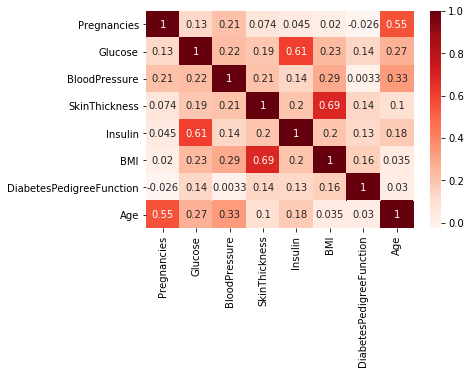

In [79]:
sns.heatmap(df_non_zero_bmi.corr(),cmap='Reds',annot=True);

#### <font color='green'> Observations:</font>
####  &nbsp; &nbsp; &nbsp; &nbsp; There is relation between BMI and SkinThickness
<hr><br>

In [80]:
#Find the mean value of BMI for records with SkinThickness is 23.0
df_non_zero_bmi[df_non_zero_bmi["SkinThickness"]==23.0]["BMI"].mean()

31.37272727272727

In [81]:
df_input.loc[[145,371],"BMI"]=31.37

In [82]:
df_zero_bmi=df_input[df_input["BMI"]==0].copy()
df_zero_bmi

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


#### <font color='green'> Observations:</font>
####  &nbsp; &nbsp; &nbsp; &nbsp; Zero values for BMI has been removed
<hr><br>

In [83]:
#Information about the dataset
df_input.info()
print (f"Number of records in dataframe{df_input.shape[0]}")  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               757 non-null    int64  
 1   Glucose                   757 non-null    int64  
 2   BloodPressure             757 non-null    float64
 3   SkinThickness             757 non-null    float64
 4   Insulin                   757 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  757 non-null    float64
 7   Age                       757 non-null    int64  
 8   Outcome                   757 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 79.1 KB
Number of records in dataframe757


#### <font color='green'> Observations:</font>
####  &nbsp; &nbsp; &nbsp; &nbsp; Initial number of records : 768
####  &nbsp; &nbsp; &nbsp; &nbsp; After cleaning, number of records : 758
####  &nbsp; &nbsp; &nbsp; &nbsp; Records removed : 10
<hr><br>

### Data Exploration task
    1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

    2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

    3. Perform correlation analysis. Visually explore it using a heat map.

(array([0, 1], dtype=int64), array([492, 265], dtype=int64))


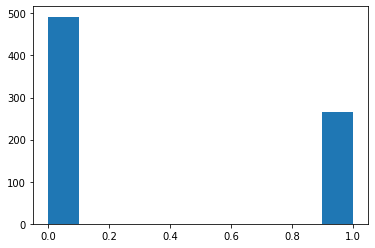

In [84]:
print (np.unique(df_input.Outcome, return_counts=True))
plt.hist(df_input.Outcome);

#### <font color='green'> Observations:</font>
####  &nbsp; &nbsp; &nbsp; &nbsp; The dependent variable 'Outcome' is a categorical varible, having values 0,1
####  &nbsp; &nbsp; &nbsp; &nbsp; 493 records having value as 0 and 265 records having value as 1
####  &nbsp; &nbsp; &nbsp; &nbsp; 65% of records having 0 value and 35% records having value as 1
<hr><br>

In [85]:
# Delete unncessary dataframes
del(df_non_zero_bmi)
del(df_zero_bmi)

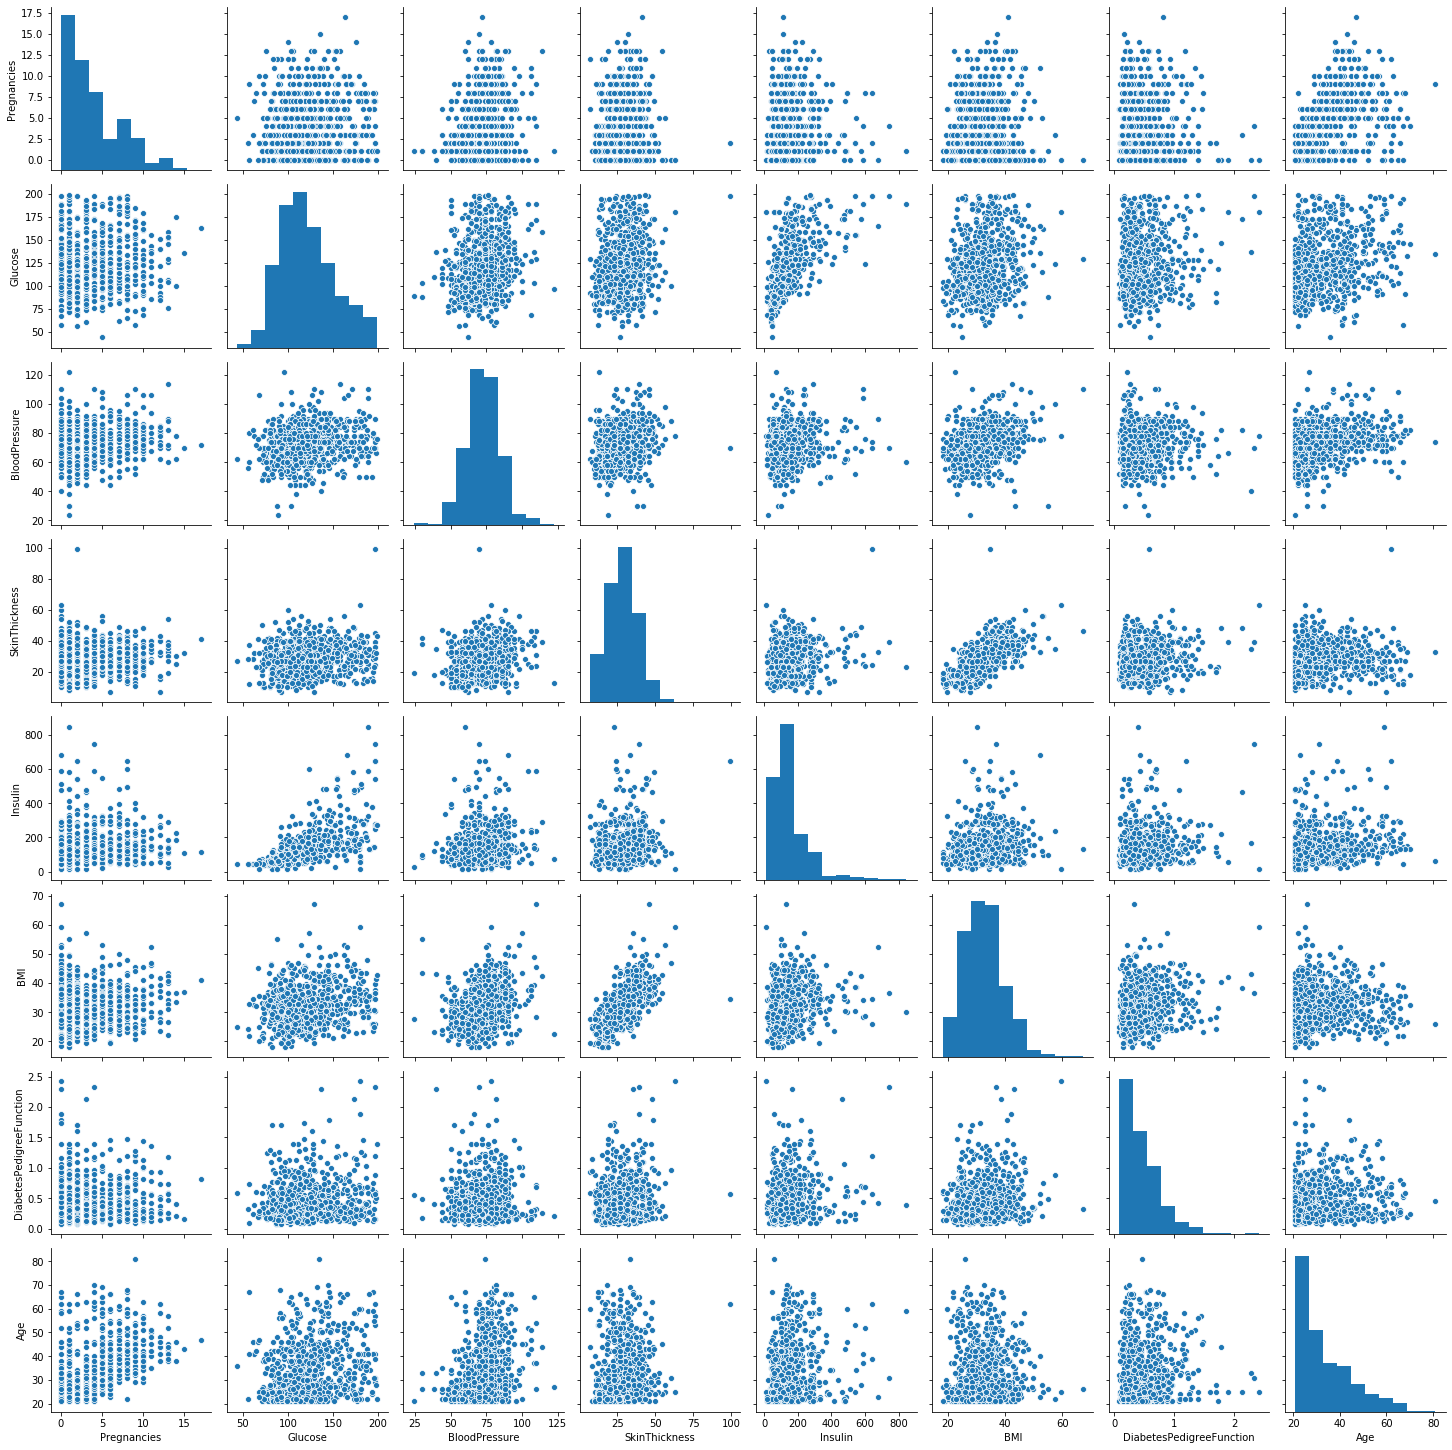

In [86]:
#Create a dummy data frame
df_dummy = df_input.copy()
#Delete  categprocal dependent variable 'Outcome'
df_dummy.drop(['Outcome'], axis=1, inplace=True)
#Find the relationship between variables
sns.pairplot(df_dummy);

#### <font color='green'> Observations:</font>
####  &nbsp; &nbsp; &nbsp; &nbsp; There a positive correlation between SkinThickness and BMI
####  &nbsp; &nbsp; &nbsp; &nbsp; There a positive correlation between Glucose and Insulin
####  &nbsp; &nbsp; &nbsp; &nbsp; 
<hr><br>

### Data Modelling
    1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

    2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.
    
    3. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

For the <b> validation framework </b> there are Train_Test_Split method and Cross Validation techniques were there.
In the Train_Test_Split method entire dataset is split into Train and Test based on 70-30 ratio.(i.e 70% data will be allocated to training dataset and remaining 30% data will be allocated to testing purpose.In this method there will be possibility that training data may be exposed to certain characteristics where testing data is not aware of.Because of this problem model efficiency will get effected.

In the Cross validation technique (i.e K-fold Cross Validation) entire data is split in to K-folds and each data will go through training and testing data iteratively and average performance score will be calculated.


In [87]:
#Save the independent variables in dataframe 'x', and dependent variable as y
x = df_input.drop(["Outcome"],axis=1)
y = df_input['Outcome']

In [88]:
#Print the characteristics of x independent variables
x.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000
mean,3.836196,121.833554,72.364757,28.530461,151.498340,32.450647,0.474066,33.199472
std,3.375074,30.498396,12.178849,9.994438,103.180999,6.885338,0.332288,11.629469
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,100.000000,64.000000,21.839837,85.000000,27.500000,0.245000,24.000000
50%,3.000000,117.000000,72.000000,28.000000,129.000000,32.300000,0.378000,29.000000
75%,6.000000,141.000000,80.000000,35.000000,182.000000,36.600000,0.627000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [89]:
#make sure that all the independent variables are in the same scale
x_std = standardize(x)

In [90]:
#Finding the cross validation score for Logistic Regression
score_data = {"LogisticRegression" : cross_val_score(LogisticRegression(), x_std,y),
"SVM" : cross_val_score(SVC(), x_std, y),
"RandomForest": cross_val_score(RandomForestClassifier(), x_std, y),
"DecisionTree" : cross_val_score(DecisionTreeClassifier(), x_std, y),
"XGradientBoosting":cross_val_score(XGBClassifier(), x_std, y),
"KNN": cross_val_score(KNeighborsClassifier(), x_std, y) 
}
df_score_data = pd.DataFrame(data=score_data)
df_score_data

,LogisticRegression,SVM,RandomForest,DecisionTree,XGradientBoosting,KNN
0,0.763158,0.763158,0.736842,0.736842,0.717105,0.736842
1,0.743421,0.717105,0.756579,0.638158,0.743421,0.743421
2,0.781457,0.754967,0.761589,0.708609,0.748344,0.708609
3,0.788079,0.801325,0.801325,0.721854,0.788079,0.741722
4,0.761589,0.768212,0.748344,0.728477,0.715232,0.788079


In [91]:
df_score_data.mean()

LogisticRegression    0.767541
SVM                   0.760953
RandomForest          0.760936
DecisionTree          0.706788
XGradientBoosting     0.742436
KNN                   0.743735
dtype: float64

#### <font color='green'> Observations:</font>
####  &nbsp; &nbsp; &nbsp; &nbsp; Logistic Regression scores better than SVM,Random Forest,Decision Tree,XGradientBoosting and KNN
<hr><br>

In [92]:
#Splitting for training and testing data
x_train,x_test,y_train,y_test = train_test_split(x_std,y,test_size=0.3,random_state= 1)

In [93]:
#Create Logistic Regression Estimator
lr=LogisticRegression()
# Fir the training data
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
#Predict the results for test values
y_pred = lr.predict(x_test)

In [95]:
#Print confusion matrix
confusion_matrix(y_test, y_pred, labels=[0,1])

array([[125,  22],
       [ 33,  48]], dtype=int64)

#### <font color='green'> Observations:</font>
####  &nbsp; &nbsp; &nbsp; &nbsp; From the above confusion matrix:
####  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 125 zero values are able to predict correctly.
####  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 48 One values are able to predict correctly.
####  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 33 actual One values predicted as zero
####  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 22 actual zero values predicted as 1
<hr><br>

In [96]:
#Printing the classification report
print (classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       147
           1       0.69      0.59      0.64        81

    accuracy                           0.76       228
   macro avg       0.74      0.72      0.73       228
weighted avg       0.75      0.76      0.75       228



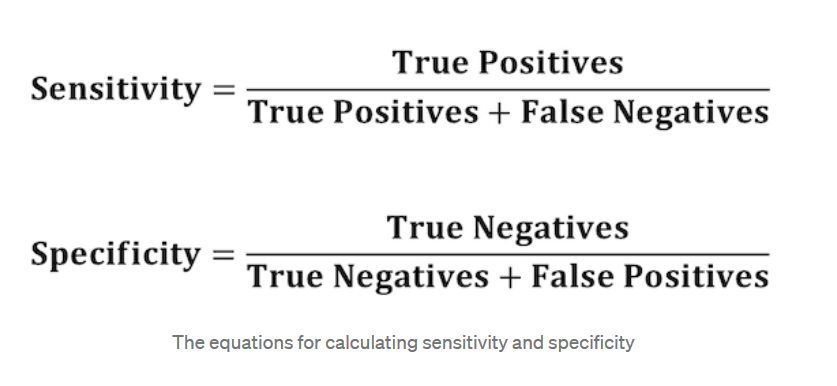

In [97]:
Image("Eqn1.png",width=600,height=350)

<p>
    Sensitivity the metric that evaluates a model's ability to predict true positives of each available category.
    <br>
    Specificity is the metric that evaluates a model's ability to predict true negatives of each available category.
    <br>
    In the above classification report , recall of the positive class is also known as 'Sensitivity' and recall of the negative class is 'Specificity'.
</p>

#### <font color='green'> Observations:</font>
####  &nbsp; &nbsp; &nbsp; &nbsp; Sensitivity = 0.59
####  &nbsp; &nbsp; &nbsp; &nbsp; Specificity = 0.85
####  &nbsp; &nbsp; &nbsp; &nbsp; This model is predicting 0 better than 1.
<hr><br>

#### AUC-ROC curve (Area Under the Curve, Receiver Operating Characteristics)
<p>
    It tells how much model is capable of distingushing between classes.Higher the AUC better the model is predicting 0s as 0s and 1s as 1s.
    <br>The ROC curve is plotted with TPR (True Positive Rate) in y axis and FPR (False Positive Rate) in the x- axis.
</p>
<p>
    An excellent model has AUC near to the 1 which means it has good measure of separability. A poor model has AUC near to 0 which means it has worst measure of seperability,In fact it means it is reciprocating the result.It is predicting 0s as 1s and 1s as 0s. And when AUC is 0.5, it means the model has no class seperation capacity.
</p>

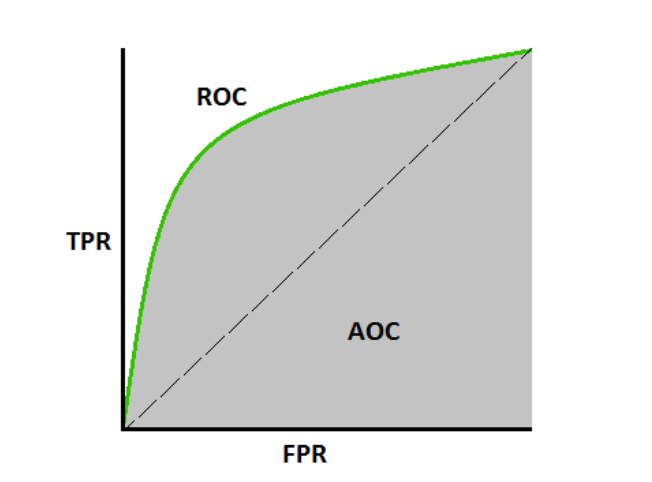

In [98]:
Image("AUC.png",width=500,height=250)

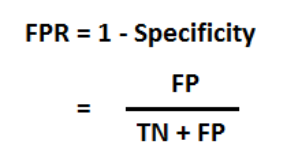

In [99]:
Image("FPR.png", width=200, height=100)

In [100]:
probs = lr.predict_proba(x_test)
preds=probs[:,1]

In [101]:
fpr,tpr,threshold=roc_curve(y_test, preds)

In [102]:
roc_auc =auc(fpr,tpr)

In [103]:
roc_auc

0.8271604938271605

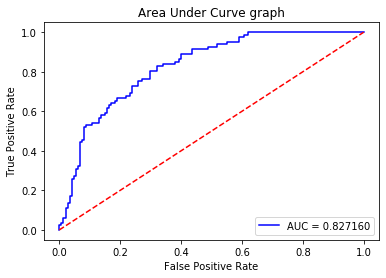

In [104]:
plt.plot(fpr,tpr,'b', label = 'AUC = %f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Area Under Curve graph')
plt.show()

In [106]:
df_input.to_excel('health_care_cleaned.xlsx')